# **Car Price Prediction**

### **Importing Libraries**

In [42]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

### **Importing dataset** 

In [43]:
df = pd.read_csv("car data.csv")

In [44]:
# Having a look into data
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [45]:
# Checking shape(rows, columns) of data 
df.shape

(301, 9)

In [46]:
# Checking for dtypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Printing unique values for ['Year', 'Fuel_Type', 'Seller_Type', 'Transmission','Owner'] columns as other remaining columns could contaion highly variable values.

In [47]:
for i in df:
    if i in ['Year', 'Fuel_Type', 'Seller_Type', 'Transmission','Owner']:
        print("Unique values for",i, "--->" ,df[i].unique(), ",and those are total :", df[i].nunique(), end = "\n\n") 
      

Unique values for Year ---> [2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007] ,and those are total : 16

Unique values for Fuel_Type ---> ['Petrol' 'Diesel' 'CNG'] ,and those are total : 3

Unique values for Seller_Type ---> ['Dealer' 'Individual'] ,and those are total : 2

Unique values for Transmission ---> ['Manual' 'Automatic'] ,and those are total : 2

Unique values for Owner ---> [0 1 3] ,and those are total : 3



In [48]:
# Checking for missing or null Values
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [49]:
# Checkign Statistical values 
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Removing "Car_Name" in new dataset as its not required for current scenario as it would not help much in prediction the preuce of car as car has a unique name.

In [50]:
df1 = df.drop('Car_Name', axis=1)

In [51]:
df1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [52]:
# Creating new column to get new derived column from 'Year' and 'Current_Year' as "No_Of_Year"
df1['Current_Year'] = 2024

In [53]:
df1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024


In [54]:
# Creating new column named 'No_of_Years' so that we can use this measure for prediction of price in to current year
df1['No_of_Years'] = df1['Current_Year'] - df1['Year']

In [55]:
df1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_of_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024,10
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024,11
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024,7
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024,13
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024,10


In [56]:
# Dropping 'Year' and 'Current_Year' as those won't be the measure used for prediction of price
df1.drop(columns=(['Year', 'Current_Year']), axis = 1, inplace = True)

In [57]:
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


### **Converting Nominal/Categorical Data to Numerical datatype**

In [58]:
# get_dummies helps to convert categorical into numerical data type just like onehot encoding. 
df1=pd.get_dummies(df1, drop_first=True) 
# Here "drop_first=True" means that we drop first column of that column which gets converted to numerical one 

In [59]:
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,0,1,0,1
1,4.75,9.54,43000,0,11,1,0,0,1
2,7.25,9.85,6900,0,7,0,1,0,1
3,2.85,4.15,5200,0,13,0,1,0,1
4,4.60,6.87,42450,0,10,1,0,0,1


In [60]:
# Correlation between numerical columns
df1.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_of_Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


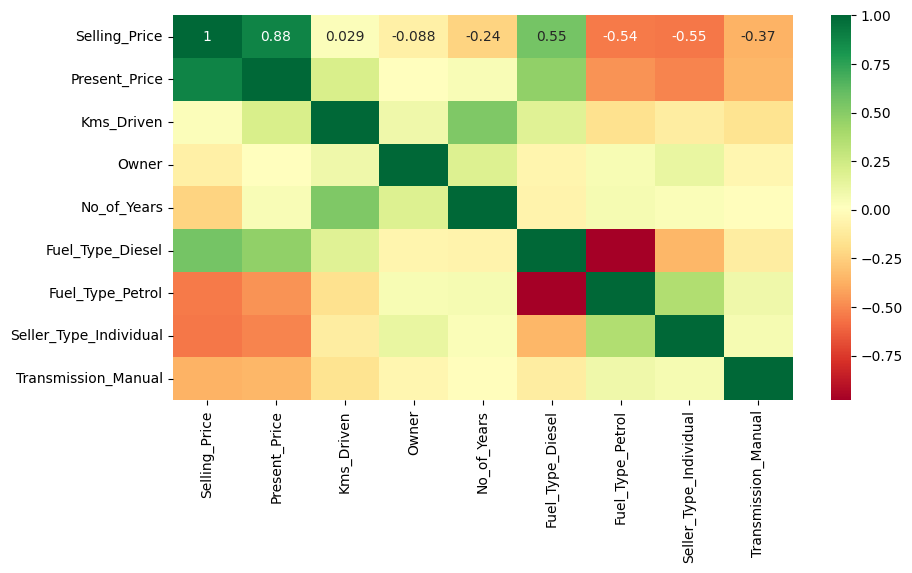

In [61]:
#Plotting Heatmap to check the correlation between each columns
corrmap = df1.corr()
top_corr_features = corrmap.index 
plt.figure(figsize=(10,5))
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## **Training the model**

### **Splitting the data into train_test_split model**

In [62]:
# Independent variables
X = df1.drop("Selling_Price", axis = 1)

# Dependent variables
y = df1['Selling_Price']

In [63]:
X.head()

,Present_Price,Kms_Driven,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,10,0,1,0,1
1,9.54,43000,0,11,1,0,0,1
2,9.85,6900,0,7,0,1,0,1
3,4.15,5200,0,13,0,1,0,1
4,6.87,42450,0,10,1,0,0,1


In [64]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

### **Checking for Feature Importance**

In [65]:
## Feature Importance 
from  sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [66]:
print(model.feature_importances_)

[0.39148825 0.04089517 0.00122694 0.07655608 0.21100406 0.01548117
 0.1349868  0.12836154]


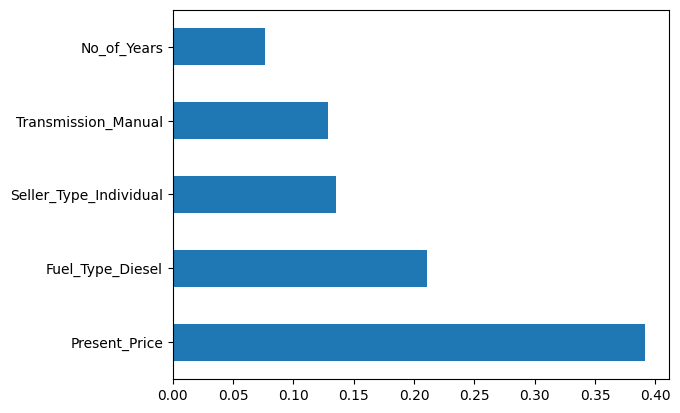

In [67]:
# Plotting the top 5 important features available
feature_importance =pd.Series(model.feature_importances_, index = X.columns)
feature_importance.nlargest(5).plot(kind = 'barh')
plt.show()

In [68]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [69]:
x_train.shape

(240, 8)

In [70]:
x_test.shape

(61, 8)

In [71]:
y_test.shape

(61,)

In [72]:
y_train.shape

(240,)

### **Training the model - Linear Regression**

In [73]:
from sklearn.linear_model import LinearRegression

linr = LinearRegression()

linr.fit(x_train, y_train)

LinearRegression()

In [74]:
# Predicting values for x_test
y_pred = linr.predict(x_test)

In [75]:
# printing out top 10 predicted values
y_pred[:10]

array([ 7.78311122,  0.80492133,  1.88830514,  2.05092328,  5.25115027,
        6.80264993, 19.67617202, -3.31906928,  1.01503656,  4.40955539])

In [76]:
# Verfying the test values with above predicted values
print(list(y_test[:10]), end = " ")

[8.4, 0.5, 2.55, 0.9, 4.8, 4.75, 19.99, 0.2, 0.75, 3.9] 

In [77]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, y_pred))

5.075348220392676


In [78]:
from sklearn import metrics
print('MSE---->', metrics.mean_squared_error(y_test, y_pred))
print('RMSE--->', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE----> 5.075348220392676
RMSE---> 2.2528533508403683


In [79]:
from sklearn.metrics import r2_score, adjusted_rand_score

print(r2_score(y_test, y_pred))

0.8436773164235075


C:\Users\RKC\AppData\Local\Temp\ipykernel_20908\2332411778.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred)


<Axes: xlabel='Selling_Price', ylabel='Density'>

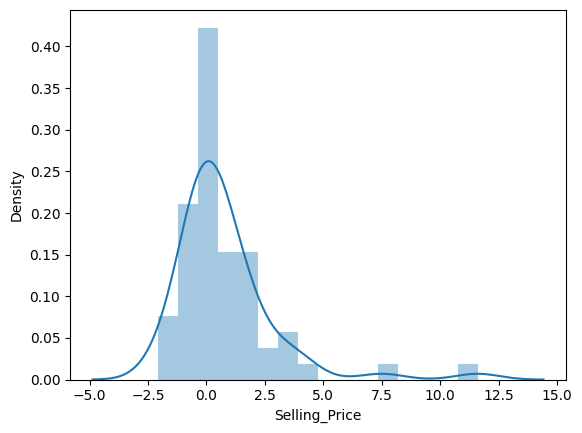

In [80]:
sns.distplot(y_test - y_pred)

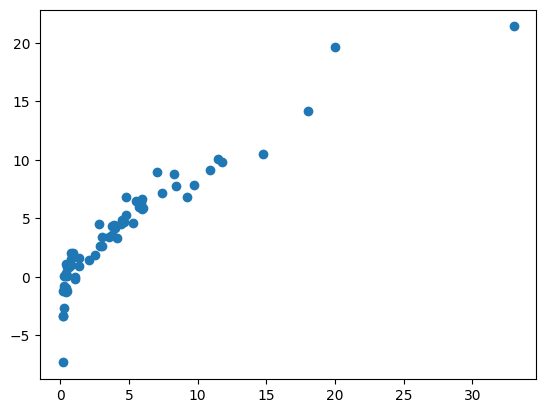

In [81]:
plt.scatter(y_test, y_pred) 

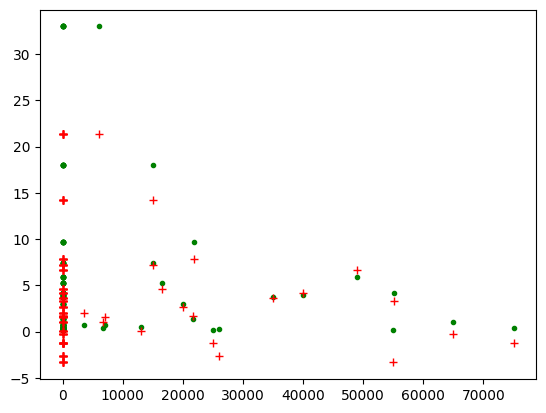

In [82]:
plt.plot(x_test[20:40], y_test[20:40], '.', color = 'green')
plt.plot(x_test[20:40], y_pred[20:40], '+', color = 'red')
plt.show()
# Red + represents Predicted values
# Green . represents Test values

------

### **Training the model - Random Forest**

In [83]:
from sklearn.ensemble import RandomForestRegressor

rnd = RandomForestRegressor()

In [84]:
rnd.fit(x_train, y_train)

RandomForestRegressor()

In [85]:
y_pred = rnd.predict(x_test)

In [86]:
y_pred[:10]

array([ 9.085 ,  0.6696,  2.4325,  0.7555,  5.172 ,  5.8016, 21.8925,
        0.1673,  0.5672,  4.084 ])

In [87]:
list(y_test[:10])

[8.4, 0.5, 2.55, 0.9, 4.8, 4.75, 19.99, 0.2, 0.75, 3.9]

In [88]:
from sklearn import metrics
print('MSE---->', metrics.mean_squared_error(y_test, y_pred))
print('RMSE--->', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE----> 2.4694516872131147
RMSE---> 1.5714489133322518


C:\Users\RKC\AppData\Local\Temp\ipykernel_20908\2332411778.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred)


<Axes: xlabel='Selling_Price', ylabel='Density'>

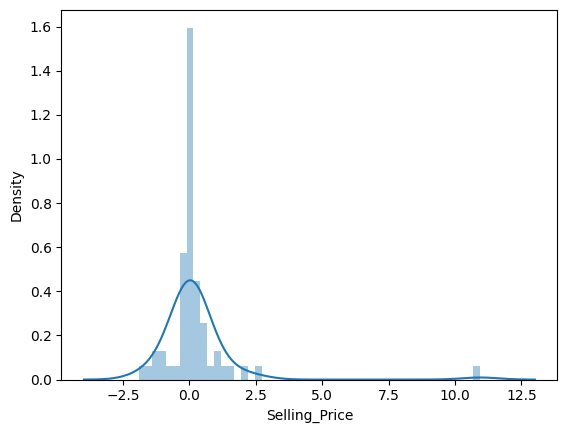

In [89]:
sns.distplot(y_test - y_pred)

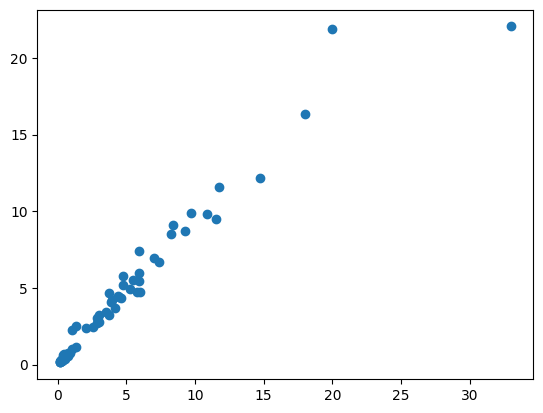

In [90]:
plt.scatter(y_test, y_pred) 

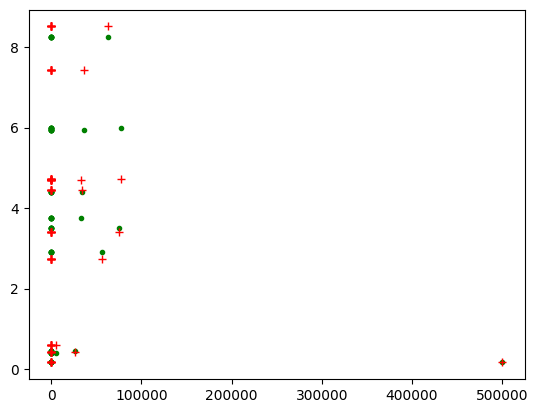

In [91]:
plt.plot(x_test[10:20], y_test[10:20], '.', color = 'green')
plt.plot(x_test[10:20], y_pred[10:20], '+', color = 'red')
plt.show()

In [99]:
# Giving a test data of a 1st car in the above dataset.
Test = [[5.59,27000, 0, 10, 0, 1, 0,1]]
# Present_Price, Kms_Driven, Owner, No_of_Years, Fuel_Type_Diesel, Fuel_Type_Petrol, Seller_Type_Individual, Transmission_Manual
prediction = linr.predict(Test)
prediction1 = rnd.predict(Test)

print(f"The actual cost of car is{df1.iloc[0:1,0:1]}, and predicted value of the same is {prediction} using Linear Regression", end = " \n")
print(f"The actual cost of car is{df1.iloc[0:1,0:1]}, and predicted value of the same is {prediction1} using Random Forest")

The actual cost of car is   Selling_Price
0           3.35, and predicted value of the same is [3.92678477] using Linear Regression 
The actual cost of car is   Selling_Price
0           3.35, and predicted value of the same is [3.76] using Random Forest


c:\Users\RKC\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\RKC\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
